In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Correct file path
file_path = '/content/drive/MyDrive/priority tickets.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,Assigned To UserID,Next Action UserID,Ticket Number,Note Created By UserID,Entered On,Ticket Labor Hours,Ticket Type,Escalated On,Closed On,Required On,Severity
0,NaN,cminaya,79997,cminaya,2024-01-01T00:06:07.4830000,0.416667,Administration,NaN,2024-01-08T08:49:51.0000000,NaN,NaN
1,NaN,cminaya,80040,cminaya,2024-01-02T15:48:55.0730000,0.364583,IT Services - Desktop,2024-01-03T17:15:04.2600000,2024-01-03T17:15:04.4170000,NaN,Non-Critical (Standard)
2,NaN,cminaya,80040,EscalationRule,2024-01-02T15:48:55.0730000,0.364583,IT Services - Desktop,2024-01-03T17:15:04.2600000,2024-01-03T17:15:04.4170000,NaN,Non-Critical (Standard)
3,NaN,cminaya,80075,admin,2024-01-04T09:24:32.2200000,0.020833,IT Services - Hardware,NaN,2024-01-22T14:39:33.0000000,NaN,Non-Critical (Standard)
4,NaN,cminaya,80075,cminaya,2024-01-04T09:24:32.2200000,0.020833,IT Services - Hardware,NaN,2024-01-22T14:39:33.0000000,NaN,Non-Critical (Standard)


In [3]:
# Ensure 'Entered On' is in datetime format
df['Entered On'] = pd.to_datetime(df['Entered On'])

# Replace NaN values in 'Required On' with 'Entered On' + 10 days
df['Required On'].fillna(df['Entered On'] + pd.Timedelta(days=10), inplace=True)

# Display the updated DataFrame to verify the changes
df.head()


<ipython-input-3-c8826cdd72ee>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Required On'].fillna(df['Entered On'] + pd.Timedelta(days=10), inplace=True)


,Assigned To UserID,Next Action UserID,Ticket Number,Note Created By UserID,Entered On,Ticket Labor Hours,Ticket Type,Escalated On,Closed On,Required On,Severity
0,NaN,cminaya,79997,cminaya,2024-01-01 00:06:07.483,0.416667,Administration,NaN,2024-01-08T08:49:51.0000000,2024-01-11 00:06:07.483000,NaN
1,NaN,cminaya,80040,cminaya,2024-01-02 15:48:55.073,0.364583,IT Services - Desktop,2024-01-03T17:15:04.2600000,2024-01-03T17:15:04.4170000,2024-01-12 15:48:55.073000,Non-Critical (Standard)
2,NaN,cminaya,80040,EscalationRule,2024-01-02 15:48:55.073,0.364583,IT Services - Desktop,2024-01-03T17:15:04.2600000,2024-01-03T17:15:04.4170000,2024-01-12 15:48:55.073000,Non-Critical (Standard)
3,NaN,cminaya,80075,admin,2024-01-04 09:24:32.220,0.020833,IT Services - Hardware,NaN,2024-01-22T14:39:33.0000000,2024-01-14 09:24:32.220000,Non-Critical (Standard)
4,NaN,cminaya,80075,cminaya,2024-01-04 09:24:32.220,0.020833,IT Services - Hardware,NaN,2024-01-22T14:39:33.0000000,2024-01-14 09:24:32.220000,Non-Critical (Standard)


Going with random forest

In [4]:
import pandas as pd
from datetime import timedelta



# Convert the 'Required On' column to datetime format
df['Required On'] = pd.to_datetime(df['Required On'], errors='coerce')

# Define the entered date (example: '2024-11-01')
entered_date = pd.to_datetime('2024-11-01')

# Replace NaN values in 'Required On' with entered date + 10 days
df['Required On'] = df['Required On'].fillna(entered_date + timedelta(days=10))

print(df)


     Assigned To UserID Next Action UserID  Ticket Number  \
0                   NaN            cminaya          79997   
1                   NaN            cminaya          80040   
2                   NaN            cminaya          80040   
3                   NaN            cminaya          80075   
4                   NaN            cminaya          80075   
...                 ...                ...            ...   
3183            jzuniga             wdavis          86863   
3184        kwiscovitch         frodriguez          86913   
3185        kwiscovitch         frodriguez          86913   
3186             tcates            jzuniga          82817   
3187             tcates            jzuniga          82817   

     Note Created By UserID              Entered On  Ticket Labor Hours  \
0                   cminaya 2024-01-01 00:06:07.483            0.416667   
1                   cminaya 2024-01-02 15:48:55.073            0.364583   
2            EscalationRule 2024-01-02 15:

In [5]:
# Filter DataFrame by 'User ID'
user_ids = ['jjuscamaita', 'jzuniga', 'lingram', 'cminaya', 'dwest']
filtered_df = df[df['Note Created By UserID'].isin(user_ids)]

# Display the filtered DataFrame
print(filtered_df)


     Assigned To UserID Next Action UserID  Ticket Number  \
0                   NaN            cminaya          79997   
1                   NaN            cminaya          80040   
4                   NaN            cminaya          80075   
6                   NaN            cminaya          80075   
7                   NaN            cminaya          80078   
...                 ...                ...            ...   
3168            jzuniga        kwiscovitch          86742   
3172            jzuniga        kwiscovitch          86852   
3177            jzuniga        kwiscovitch          86943   
3179            jzuniga        kwiscovitch          87012   
3182            jzuniga             wdavis          86863   

     Note Created By UserID              Entered On  Ticket Labor Hours  \
0                   cminaya 2024-01-01 00:06:07.483            0.416667   
1                   cminaya 2024-01-02 15:48:55.073            0.364583   
4                   cminaya 2024-01-04 09:

In [6]:
# Replace all NaN values in the filtered DataFrame with "Nothing"
filtered_df = filtered_df.fillna("Nothing")

# Display the filtered DataFrame
print(filtered_df)

     Assigned To UserID Next Action UserID  Ticket Number  \
0               Nothing            cminaya          79997   
1               Nothing            cminaya          80040   
4               Nothing            cminaya          80075   
6               Nothing            cminaya          80075   
7               Nothing            cminaya          80078   
...                 ...                ...            ...   
3168            jzuniga        kwiscovitch          86742   
3172            jzuniga        kwiscovitch          86852   
3177            jzuniga        kwiscovitch          86943   
3179            jzuniga        kwiscovitch          87012   
3182            jzuniga             wdavis          86863   

     Note Created By UserID              Entered On  Ticket Labor Hours  \
0                   cminaya 2024-01-01 00:06:07.483            0.416667   
1                   cminaya 2024-01-02 15:48:55.073            0.364583   
4                   cminaya 2024-01-04 09:

In [7]:
# Assuming the column 'Ticket Type' is in the DataFrame 'filtered_df'
ticket_types = filtered_df['Ticket Type'].unique()

# Display the unique ticket types
print(ticket_types)


['Administration' 'IT Services - Desktop' 'IT Services - Hardware'
 'IT Services - Laptop' 'IT Services - Network' 'IT Services - Telecom'
 'IT Services - DHR Hardware Maintenance' 'IT Services - Cloud'
 'IT Services - Managed Services' 'IT Services - Software Services' 'HR'
 'Training Services' 'Web Services' 'IT Services - Virtual Machine (VM)'
 'Application Services - Programming']


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'filtered_df' is your original DataFrame
# Load your DataFrame here
# filtered_df = pd.read_csv('your_data.csv')  # Example of loading data

# Create a subset DataFrame with the specified columns
subset_columns = ["Severity", "Required On", "Entered On", "Ticket Type", "Ticket Labor Hours","Note Created By UserID"]
subset_df = filtered_df[subset_columns]

# Display the first few rows of the subset DataFrame (optional)
print("Subset DataFrame:")
print(subset_df.head())





Subset DataFrame:
                  Severity             Required On              Entered On  \
0                  Nothing 2024-01-11 00:06:07.483 2024-01-01 00:06:07.483   
1  Non-Critical (Standard) 2024-01-12 15:48:55.073 2024-01-02 15:48:55.073   
4  Non-Critical (Standard) 2024-01-14 09:24:32.220 2024-01-04 09:24:32.220   
6  Non-Critical (Standard) 2024-01-14 09:24:32.220 2024-01-04 09:24:32.220   
7  Non-Critical (Standard) 2024-01-14 11:07:45.820 2024-01-04 11:07:45.820   

              Ticket Type  Ticket Labor Hours Note Created By UserID  
0          Administration            0.416667                cminaya  
1   IT Services - Desktop            0.364583                cminaya  
4  IT Services - Hardware            0.020833                cminaya  
6  IT Services - Hardware            0.020833                jzuniga  
7  IT Services - Hardware            0.031250                cminaya  


Moving forward with logistic regression

Subset DataFrame:
                  Severity             Required On              Entered On  \
0                  Nothing 2024-01-11 00:06:07.483 2024-01-01 00:06:07.483   
1  Non-Critical (Standard) 2024-01-12 15:48:55.073 2024-01-02 15:48:55.073   
4  Non-Critical (Standard) 2024-01-14 09:24:32.220 2024-01-04 09:24:32.220   
6  Non-Critical (Standard) 2024-01-14 09:24:32.220 2024-01-04 09:24:32.220   
7  Non-Critical (Standard) 2024-01-14 11:07:45.820 2024-01-04 11:07:45.820   

              Ticket Type  Ticket Labor Hours Note Created By UserID  
0          Administration            0.416667                cminaya  
1   IT Services - Desktop            0.364583                cminaya  
4  IT Services - Hardware            0.020833                cminaya  
6  IT Services - Hardware            0.020833                jzuniga  
7  IT Services - Hardware            0.031250                cminaya  


<ipython-input-9-74b31a5414e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Required On'] = pd.to_datetime(subset_df['Required On'])
<ipython-input-9-74b31a5414e2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Entered On'] = pd.to_datetime(subset_df['Entered On'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting


Forecasted Ticket Counts for the Next 30 Days:
1298    1.194827
1299    1.193096
1300    1.193112
1301    1.193111
1302    1.193111
1303    1.193111
1304    1.193111
1305    1.193111
1306    1.193111
1307    1.193111
1308    1.193111
1309    1.193111
1310    1.193111
1311    1.193111
1312    1.193111
1313    1.193111
1314    1.193111
1315    1.193111
1316    1.193111
1317    1.193111
1318    1.193111
1319    1.193111
1320    1.193111
1321    1.193111
1322    1.193111
1323    1.193111
1324    1.193111
1325    1.193111
1326    1.193111
1327    1.193111
Name: predicted_mean, dtype: float64


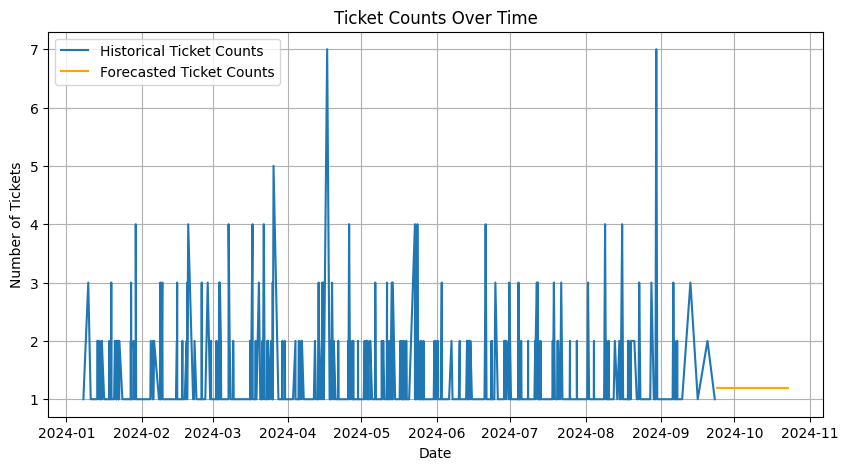


Prioritized Tickets:
      Severity             Required On              Entered On  \
2537  Critical 2024-01-10 00:00:00.000 2024-01-08 06:28:18.140   
2538  Critical 2024-01-10 00:00:00.000 2024-01-08 06:28:18.140   
1572  Critical 2024-01-12 09:33:44.760 2024-01-02 09:33:44.760   
3088  Critical 2024-01-13 06:15:05.603 2024-01-03 06:15:05.603   
2540  Critical 2024-01-17 00:00:00.000 2024-01-08 06:34:10.657   
...        ...                     ...                     ...   
2148   Nothing 2024-07-04 00:06:09.923 2024-06-24 00:06:09.923   
415    Nothing 2024-07-04 00:06:11.673 2024-06-24 00:06:11.673   
2534    OnCall 2024-01-16 12:32:13.183 2024-01-06 12:32:13.183   
3101    Urgent 2024-02-29 13:20:10.620 2024-02-19 13:20:10.620   
2918    Urgent 2024-07-29 07:04:05.007 2024-07-19 07:04:05.007   

                             Ticket Type  Ticket Labor Hours  \
2537                      Administration            0.041667   
2538                      Administration            0.041

In [9]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming subset_df is already defined and contains the necessary columns
# Display the first few rows of the subset DataFrame
print("Subset DataFrame:")
print(subset_df.head())

# Convert date columns to datetime format
subset_df['Required On'] = pd.to_datetime(subset_df['Required On'])
subset_df['Entered On'] = pd.to_datetime(subset_df['Entered On'])

# Group by 'Required On' and count tickets
ticket_counts = subset_df.groupby('Required On').size()

# Convert to DataFrame for easier manipulation if needed
ticket_counts_df = ticket_counts.reset_index(name='Ticket Count')

# Set 'Required On' as index for time series analysis
ticket_counts_df.set_index('Required On', inplace=True)

# Fit an ARIMA model (example parameters)
model = ARIMA(ticket_counts_df['Ticket Count'], order=(1, 1, 1))  # Adjust parameters as needed
model_fit = model.fit()

# Forecast future ticket counts (e.g., next 30 days)
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Print forecast results
print("\nForecasted Ticket Counts for the Next 30 Days:")
print(forecast)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(ticket_counts_df.index, ticket_counts_df['Ticket Count'], label='Historical Ticket Counts')
plt.plot(pd.date_range(start=ticket_counts_df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps), forecast, label='Forecasted Ticket Counts', color='orange')
plt.title('Ticket Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend()
plt.grid()
plt.show()

# Prioritize tickets based on severity and due dates
prioritized_tickets = subset_df.sort_values(by=['Severity', 'Required On'])
print("\nPrioritized Tickets:")
print(prioritized_tickets)

In [10]:
# Assuming prioritized_tickets is already defined
# Prioritize tickets based on severity and due dates
prioritized_tickets = subset_df.sort_values(by=['Severity', 'Required On'])

# Save the prioritized tickets to a CSV file
prioritized_tickets.to_csv('prioritized_tickets.csv', index=False)

print("Prioritized tickets have been saved to 'prioritized_tickets.csv'.")

Prioritized tickets have been saved to 'prioritized_tickets.csv'.


In [11]:
# Assuming subset_df is already defined

# Display unique values in the 'Severity' column
unique_severity_values = subset_df['Severity'].unique()

print("Unique Severity Values:")
print(unique_severity_values)

Unique Severity Values:
['Nothing' 'Non-Critical (Standard)' 'Critical' 'OnCall' 'Urgent']


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Provided list of severity levels
severity_levels = [
    'Nothing',
    'Non-Critical (Standard)',
    'Critical',
    'OnCall',
    'Urgent'
]

# Create a DataFrame for severity levels
df_severity = pd.DataFrame(severity_levels, columns=['Original Severity'])

# Initialize label encoder for Severity
le_severity = LabelEncoder()

# Encode the Severity column
df_severity['Encoded Severity'] = le_severity.fit_transform(df_severity['Original Severity'])

# Display the summary DataFrame with original and encoded values for Severity Levels
print("Severity Encoding Summary:")
print(df_severity)

# Display unique mappings for Severity Levels
print("\nSeverity Mapping:")
for original, encoded in zip(le_severity.classes_, range(len(le_severity.classes_))):
    print(f"{original}: {encoded}")

Severity Encoding Summary:
         Original Severity  Encoded Severity
0                  Nothing                 2
1  Non-Critical (Standard)                 1
2                 Critical                 0
3                   OnCall                 3
4                   Urgent                 4

Severity Mapping:
Critical: 0
Non-Critical (Standard): 1
Nothing: 2
OnCall: 3
Urgent: 4


In [13]:
import pandas as pd

# Assuming subset_df is already defined and contains the necessary columns including 'Severity'
# Display the first few rows of the subset DataFrame
print("Subset DataFrame:")
print(subset_df.head())

# Define a mapping for severity to numeric priority (you may adjust this based on your needs)
priority_mapping = {

    'Critical': 1,
    'Urgent': 2,
    'OnCall': 3,
    'Non-Critical (Standard)': 4,
    'Nothing': 5
}


# Create a new column for numeric priority based on severity
subset_df['Priority'] = subset_df['Severity'].map(priority_mapping)

# Sort the DataFrame by priority (lower number means higher priority) and then by 'Required On'
top_priority_tickets = subset_df.sort_values(by=['Priority', 'Required On']).head(10)

# Display the top 10 priority tickets
print("\nTop 10 Priority Tickets for All Users:")
print(top_priority_tickets)

# Save the top priority tickets to a CSV file
top_priority_tickets.to_csv('top_priority_tickets_all_users.csv', index=False)

print("Top priority tickets have been saved to 'top_priority_tickets_all_users.csv'.")

Subset DataFrame:
                  Severity             Required On              Entered On  \
0                  Nothing 2024-01-11 00:06:07.483 2024-01-01 00:06:07.483   
1  Non-Critical (Standard) 2024-01-12 15:48:55.073 2024-01-02 15:48:55.073   
4  Non-Critical (Standard) 2024-01-14 09:24:32.220 2024-01-04 09:24:32.220   
6  Non-Critical (Standard) 2024-01-14 09:24:32.220 2024-01-04 09:24:32.220   
7  Non-Critical (Standard) 2024-01-14 11:07:45.820 2024-01-04 11:07:45.820   

              Ticket Type  Ticket Labor Hours Note Created By UserID  
0          Administration            0.416667                cminaya  
1   IT Services - Desktop            0.364583                cminaya  
4  IT Services - Hardware            0.020833                cminaya  
6  IT Services - Hardware            0.020833                jzuniga  
7  IT Services - Hardware            0.031250                cminaya  

Top 10 Priority Tickets for All Users:
      Severity             Required On         

<ipython-input-13-acacb5c9da9a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Priority'] = subset_df['Severity'].map(priority_mapping)


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Provided list of ticket types
ticket_types = [
    'Administration',
    'IT Services - Desktop',
    'IT Services - Hardware',
    'IT Services - Laptop',
    'IT Services - Network',
    'IT Services - Telecom',
    'IT Services - DHR Hardware Maintenance',
    'IT Services - Cloud',
    'IT Services - Managed Services',
    'IT Services - Software Services',
    'HR',
    'Training Services',
    'Web Services',
    'IT Services - Virtual Machine (VM)',
    'Application Services - Programming'
]

# Create a DataFrame from the list
df_ticket_types = pd.DataFrame(ticket_types, columns=['Original Ticket Type'])

# Initialize label encoder
le_ticket_type = LabelEncoder()

# Encode the Ticket Type column
df_ticket_types['Encoded Ticket Type'] = le_ticket_type.fit_transform(df_ticket_types['Original Ticket Type'])

# Display the summary DataFrame with original and encoded values
print("Ticket Type Encoding Summary:")
print(df_ticket_types)

# Display unique mappings for Ticket Types
print("\nTicket Type Mapping:")
for original, encoded in zip(le_ticket_type.classes_, range(len(le_ticket_type.classes_))):
    print(f"{original}: {encoded}")

Ticket Type Encoding Summary:
                      Original Ticket Type  Encoded Ticket Type
0                           Administration                    0
1                    IT Services - Desktop                    5
2                   IT Services - Hardware                    6
3                     IT Services - Laptop                    7
4                    IT Services - Network                    9
5                    IT Services - Telecom                   11
6   IT Services - DHR Hardware Maintenance                    4
7                      IT Services - Cloud                    3
8           IT Services - Managed Services                    8
9          IT Services - Software Services                   10
10                                      HR                    2
11                       Training Services                   13
12                            Web Services                   14
13      IT Services - Virtual Machine (VM)                   12
14      Ap

1. Administration: 0
2. IT Services - Desktop: 5
3. IT Services - Hardware: 6
4. IT Services - Laptop: 7
5. IT Services - Network: 9
6. IT Services - Telecom: 11
7. IT Services - DHR Hardware Maintenance: 4
8. IT Services - Cloud: 3
9. IT Services - Managed Services: 8
10. IT Services - Software Services: 10
11. HR: 2
12. Training Services: 13
13. Web Services: 14
14. IT Services - Virtual Machine (VM): 12
15. Application Services - Programming: 1

1. Critical: 0
2. Non-Critical (Standard): 1
3. Nothing: 2
4. OnCall: 3
5. Urgent: 4

Random forest

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_severity = LabelEncoder()
le_ticket_type = LabelEncoder()
le_user_id = LabelEncoder()

# Encode categorical variables
subset_df['Severity'] = le_severity.fit_transform(subset_df['Severity'])
subset_df['Ticket Type'] = le_ticket_type.fit_transform(subset_df['Ticket Type'])
subset_df['Note Created By UserID'] = le_user_id.fit_transform(subset_df['Note Created By UserID'])

# Display the encoded DataFrame
print("\nEncoded Subset DataFrame:")
print(subset_df)


Encoded Subset DataFrame:
      Severity             Required On              Entered On  Ticket Type  \
0            2 2024-01-11 00:06:07.483 2024-01-01 00:06:07.483            0   
1            1 2024-01-12 15:48:55.073 2024-01-02 15:48:55.073            5   
4            1 2024-01-14 09:24:32.220 2024-01-04 09:24:32.220            6   
6            1 2024-01-14 09:24:32.220 2024-01-04 09:24:32.220            6   
7            1 2024-01-14 11:07:45.820 2024-01-04 11:07:45.820            6   
...        ...                     ...                     ...          ...   
3168         0 2024-08-14 00:00:00.000 2024-08-11 11:44:51.543           11   
3172         0 2024-08-26 18:15:26.990 2024-08-16 18:15:26.990            6   
3177         1 2024-09-01 13:14:08.790 2024-08-22 13:14:08.790            5   
3179         1 2024-09-06 09:19:02.760 2024-08-27 09:19:02.760            6   
3182         0 2024-09-06 00:00:00.000 2024-08-18 11:58:57.530            0   

      Ticket Labor Hours

<ipython-input-15-26d364ee8ea1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Severity'] = le_severity.fit_transform(subset_df['Severity'])
<ipython-input-15-26d364ee8ea1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Ticket Type'] = le_ticket_type.fit_transform(subset_df['Ticket Type'])
<ipython-input-15-26d364ee8ea1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = subset_df[['Severity', 'Ticket Type', 'Ticket Labor Hours']]  # You can include more features if needed
y = subset_df['Note Created By UserID']  # Target variable for assignment

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Display feature importances
importances = rf_model.feature_importances_
print("\nFeature Importances:")
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Severity: 0.0735
Ticket Type: 0.3614
Ticket Labor Hours: 0.5651


In [17]:
# Predict assignments on the test set
y_pred = rf_model.predict(X_test)

# Decode predicted values back to original user IDs
predicted_assignments = le_user_id.inverse_transform(y_pred)

# Display predictions alongside actual values
results_df = pd.DataFrame({
    'Actual Assignment': le_user_id.inverse_transform(y_test),
    'Predicted Assignment': predicted_assignments
})

print("\nPredictions vs Actual Assignments:")
print(results_df)


Predictions vs Actual Assignments:
    Actual Assignment Predicted Assignment
0             jzuniga              jzuniga
1             cminaya              cminaya
2         jjuscamaita          jjuscamaita
3         jjuscamaita          jjuscamaita
4             jzuniga              jzuniga
..                ...                  ...
306           jzuniga              jzuniga
307           jzuniga              jzuniga
308       jjuscamaita              cminaya
309           jzuniga              jzuniga
310       jjuscamaita          jjuscamaita

[311 rows x 2 columns]


In [18]:
# Save the trained model and label encoders
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(le_severity, 'le_severity.pkl')
joblib.dump(le_ticket_type, 'le_ticket_type.pkl')
joblib.dump(le_user_id, 'le_user_id.pkl')

['le_user_id.pkl']

1. Administration: 0
2. IT Services - Desktop: 5
3. IT Services - Hardware: 6
4. IT Services - Laptop: 7
5. IT Services - Network: 9
6. IT Services - Telecom: 11
7. IT Services - DHR Hardware Maintenance: 4
8. IT Services - Cloud: 3
9. IT Services - Managed Services: 8
10. IT Services - Software Services: 10
11. HR: 2
12. Training Services: 13
13. Web Services: 14
14. IT Services - Virtual Machine (VM): 12
15. Application Services - Programming: 1

1. Critical: 0
2. Non-Critical (Standard): 1
3. Nothing: 2
4. OnCall: 3
5. Urgent: 4

In [22]:
import pandas as pd
import joblib  # For loading the model

# Load the trained model and label encoders
rf_model = joblib.load('random_forest_model.pkl')
le_severity = joblib.load('le_severity.pkl')
le_ticket_type = joblib.load('le_ticket_type.pkl')
le_user_id = joblib.load('le_user_id.pkl')

# Function to get user input for a new ticket
def get_user_input():
    print("Enter Severity:")
    print("1: Critical")
    print("2: Urgent")
    print("3: OnCall")
    print("4: Non-Critical (Standard)")
    print("5: Nothing")
    severity = int(input("Select a severity (1-5): "))

    ticket_type = int(input("Enter Ticket Type (0: Bug, 1: Feature): "))
    labor_hours = float(input("Enter Ticket Labor Hours: "))

    return severity, ticket_type, labor_hours

# Get user input for unseen data
user_severity, user_ticket_type, user_labor_hours = get_user_input()

# Prepare the new ticket for prediction
new_ticket = pd.DataFrame({
    'Severity': [user_severity],
    'Ticket Type': [user_ticket_type],
    'Ticket Labor Hours': [user_labor_hours]
})

# Predict the assignment for the new ticket
predicted_assignment_encoded = rf_model.predict(new_ticket)
predicted_assignment = le_user_id.inverse_transform(predicted_assignment_encoded)

# Display the prediction result
print(f"Predicted Assignment for New Ticket: {predicted_assignment[0]}")

# Optional: If you want to see predictions alongside actual values (if available)
unseen_results_df = pd.DataFrame({
    'Severity': [user_severity],
    'Ticket Type': [user_ticket_type],
    'Ticket Labor Hours': [user_labor_hours],
    'Predicted Assignment': predicted_assignment
})

print("\nUnseen Ticket Prediction:")
print(unseen_results_df)

Enter Severity:
1: Critical
2: Urgent
3: OnCall
4: Non-Critical (Standard)
5: Nothing
Select a severity (1-5): 3
Enter Ticket Type (0: Bug, 1: Feature): 0
Enter Ticket Labor Hours: 3
Predicted Assignment for New Ticket: jzuniga

Unseen Ticket Prediction:
   Severity  Ticket Type  Ticket Labor Hours Predicted Assignment
0         3            0                 3.0              jzuniga


In [20]:
 #Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.64
